<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220808_Heart_Failure_Prediction.ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Failure Prediction 실습

## 데이터 확인

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [6]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!unzip '*.zip' -d/content

Archive:  heart-failure-clinical-data.zip
  inflating: /content/heart_failure_clinical_records_dataset.csv  


In [161]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- 나이 age
- 적혈구 또는 헤모글로빈(부울)의 감소(범주) anaemia
- 혈중 CPK 효소 농도(mcg/L) creatinine_phosphokinase
- 당뇨병(부울증)이 있는 경우(범주) diabetes
- 각 수축 시 심장을 떠나는 혈액의 백분율(백분율) ejection_fraction
- 고혈압 유무 (범주) high_blood_pressure
- 혈소판(킬로 혈소판/mL) platelets
- 혈중 혈청 크레아티닌 농도(mg/dL) serum_creatinine
- 혈중 혈청 나트륨 농도(mEq/L) serum_sodium
- 성별 sex
- 흡연유무 smoking
- 사후관리기간 time
- (y) DEATH_EVENT

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [152]:
df.isnull().sum() # 넓값 없음

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [153]:
df.describe() # 수치형자료의 편차가 크다 -> 정규화

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## EDA

In [13]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

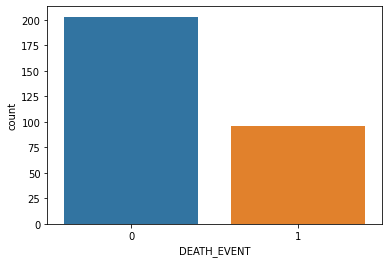

In [14]:
sns.countplot(x = 'DEATH_EVENT', data = df) # 약한 데이터 불균형 존재 오버샘플링 고려해야함

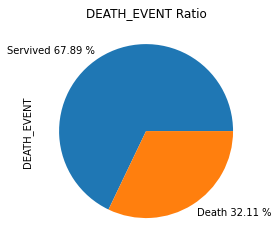

In [15]:
df["DEATH_EVENT"].value_counts().plot(kind="pie", title="DEATH_EVENT Ratio",
                                labels = ["Servived {:.2f} %".format(len(df.loc[df.DEATH_EVENT==0])*100/len(df.DEATH_EVENT)),
                                          "Death {:.2f} %".format(len(df.loc[df.DEATH_EVENT==1])*100/len(df.DEATH_EVENT))],
                                figsize=(4,4))

### 범주형 데이터 분석

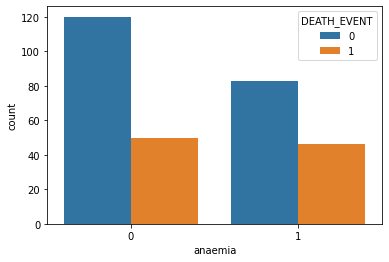

In [16]:
sns.countplot(x='anaemia', hue ='DEATH_EVENT', data = df) # 적혈구 감소 일어난 환자가 사망한 경우가 더 많음.

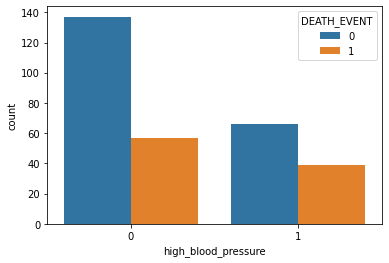

In [17]:
sns.countplot(x='high_blood_pressure', hue ='DEATH_EVENT', data = df) # 고혈압이 있는 환자가 높은 사망확률을 보임

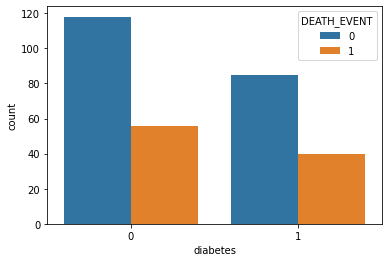

In [18]:
sns.countplot(x='diabetes', hue ='DEATH_EVENT', data = df) # 당뇨병 유무는 크게 차이가 없어보인다.

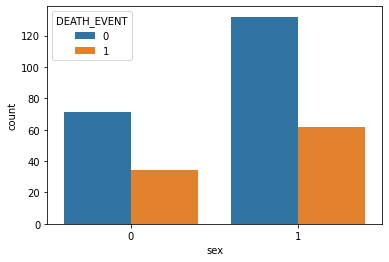

In [19]:
sns.countplot(x='sex', hue ='DEATH_EVENT', data = df) # 성별에 따른 차이는 적어보인다.

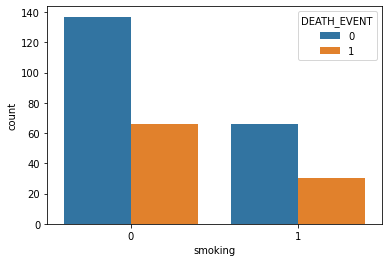

In [20]:
sns.countplot(x='smoking', hue ='DEATH_EVENT', data = df) # 흡연 유무도 큰 차이는 없어보인다.

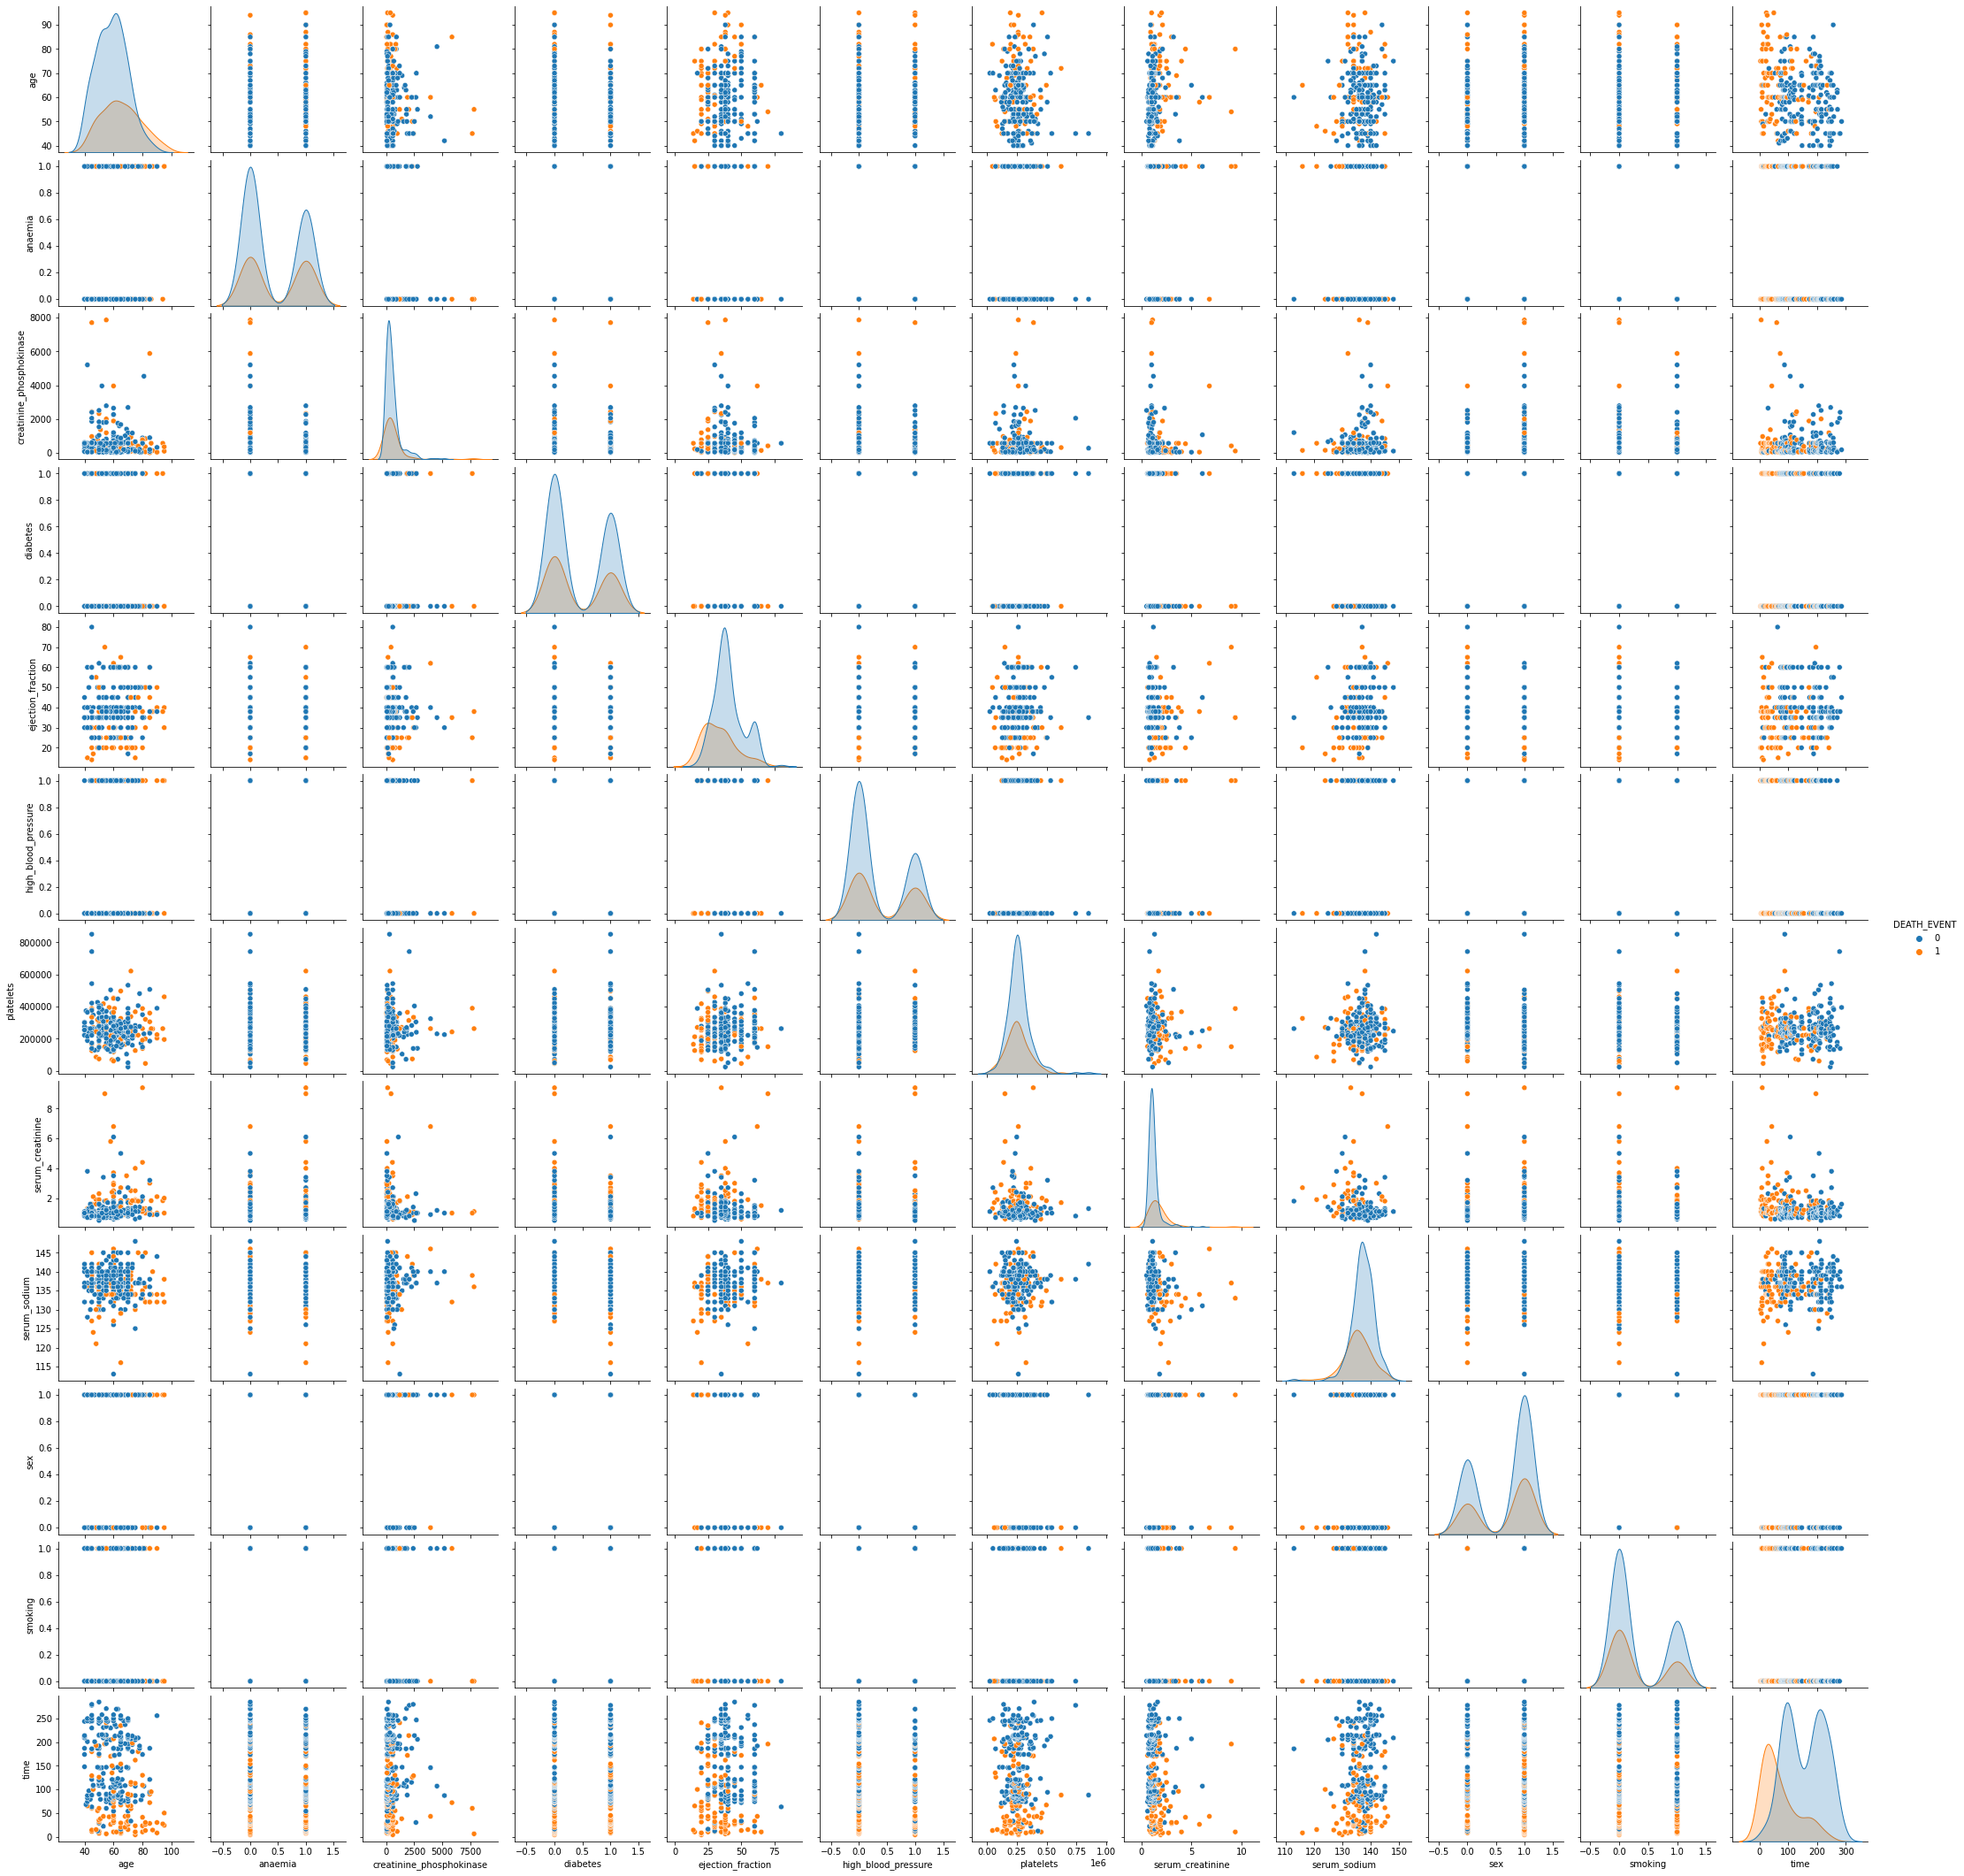

In [21]:
sns.pairplot(df, hue = 'DEATH_EVENT')

나이가 많을수록 사후관리 기간이 짧을수록 사망확률이 높은 경향이 보인다.

#### age

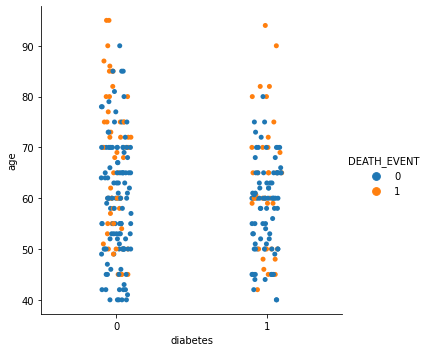

In [22]:
sns.catplot(x="diabetes", y="age", hue="DEATH_EVENT", data=df) # 당뇨의 유무보단 나이와 관련이 있다고 보여짐

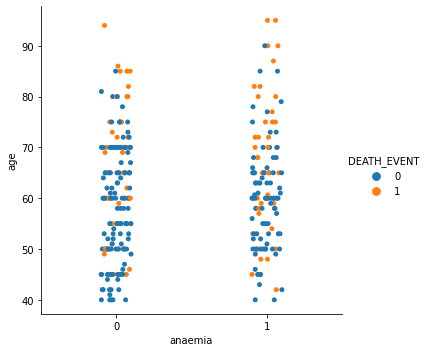

In [23]:
sns.catplot(x="anaemia", y="age", hue="DEATH_EVENT", data=df) # 빈혈의 유무에 따른 결과

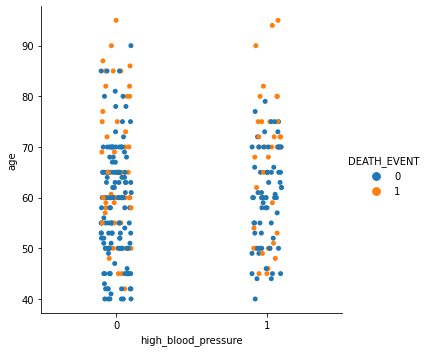

In [24]:
sns.catplot(x="high_blood_pressure", y="age", hue="DEATH_EVENT", data=df) # 고혈압 유무에 따른 결과

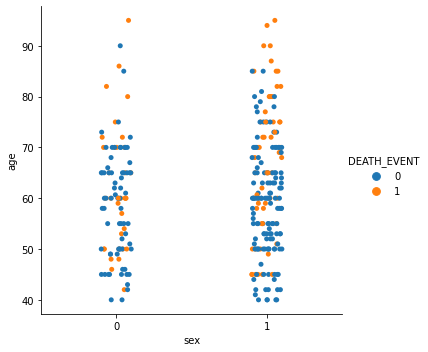

In [25]:
sns.catplot(x="sex", y="age", hue="DEATH_EVENT", data=df)

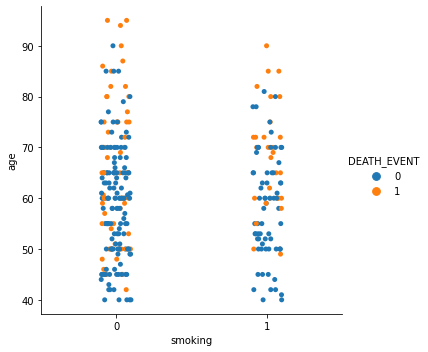

In [26]:
sns.catplot(x="smoking", y="age", hue="DEATH_EVENT", data=df)

#### time

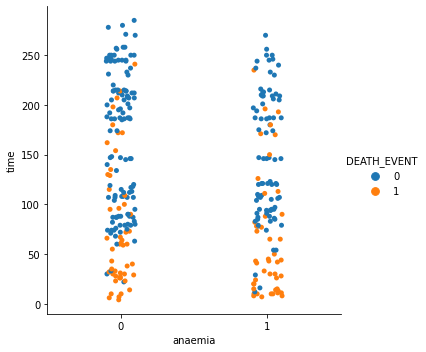

In [27]:
sns.catplot(x="anaemia", y="time", hue="DEATH_EVENT", data=df)

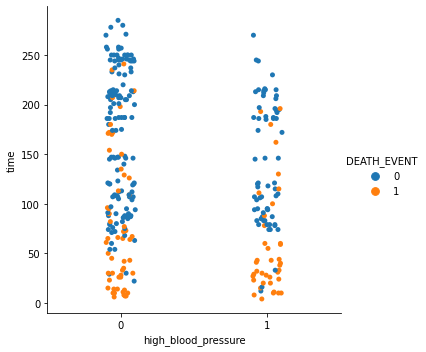

In [28]:
sns.catplot(x="high_blood_pressure", y="time", hue="DEATH_EVENT", data=df)

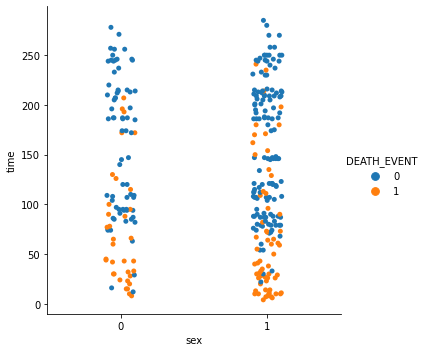

In [29]:
sns.catplot(x="sex", y="time", hue="DEATH_EVENT", data=df)

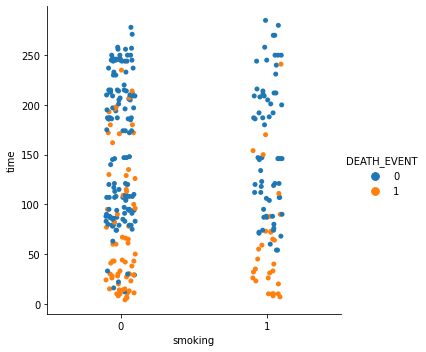

In [30]:
sns.catplot(x="smoking", y="time", hue="DEATH_EVENT", data=df)

- 나이와 시간과 직접적인 관련이 있는 변수는 없어보인다.
- 나이와 시간이 가장 중요한 변수로 보여진다.

### 수치형 데이터 시각화

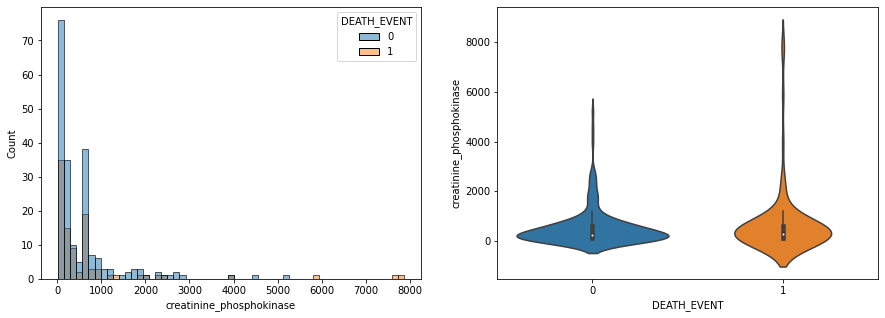

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x='creatinine_phosphokinase', hue="DEATH_EVENT", data=df)  #혈중 CPK 농도에 따른 결과. 편차가 매우 큰편
plt.subplot(122)
sns.violinplot(x='DEATH_EVENT',y= 'creatinine_phosphokinase', data=df) 

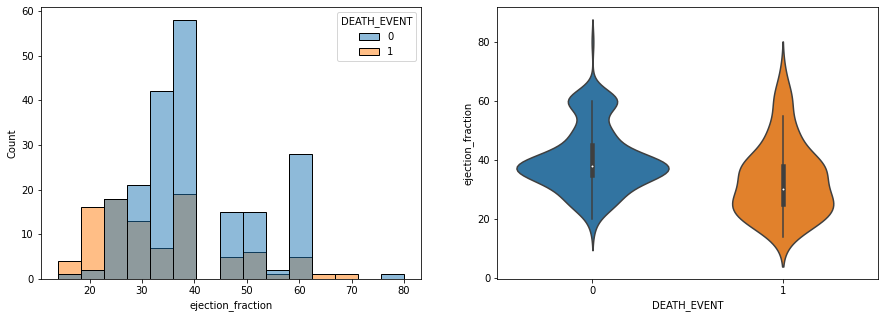

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x='ejection_fraction', hue="DEATH_EVENT", data=df) # 심장 수축능력에 따른 결과. 낮을수록 사망확률 증가하는 경향
plt.subplot(122)
sns.violinplot(x='DEATH_EVENT',y= 'ejection_fraction', data=df)

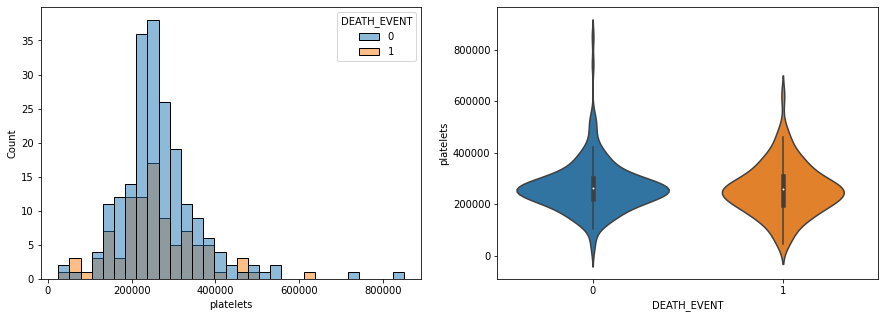

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x='platelets', hue="DEATH_EVENT", data=df) # 혈소판 수치에 따른 결과 
plt.subplot(122)
sns.violinplot(x='DEATH_EVENT',y= 'platelets', data=df)

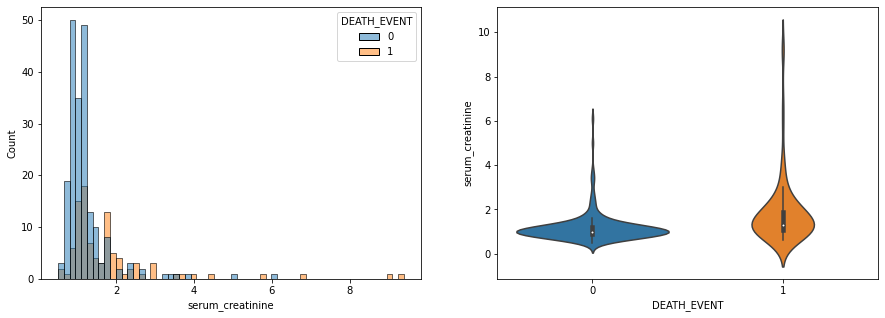

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x='serum_creatinine', hue="DEATH_EVENT", data=df) # 혈중 크레아틴 농도에 따른 결과. 높을수록 위험도가 높은것으로 보여짐
plt.subplot(122)
sns.violinplot(x='DEATH_EVENT',y= 'serum_creatinine', data=df)

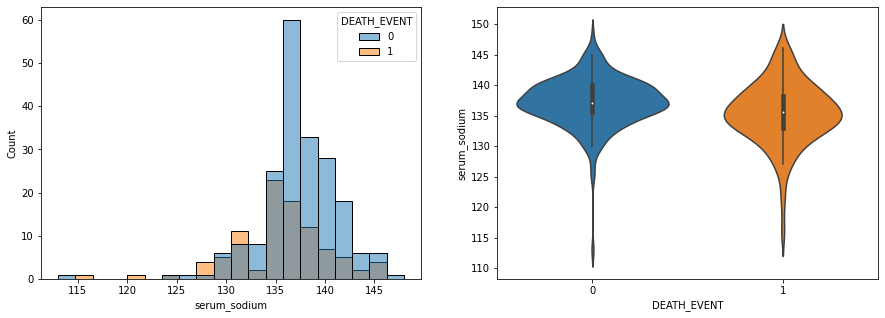

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x='serum_sodium', hue="DEATH_EVENT", data=df) # 혈중 나트륨 농도에 따른 결과. 135에서 매우 높은 사망률
plt.subplot(122)
sns.violinplot(x='DEATH_EVENT',y= 'serum_sodium', data=df)

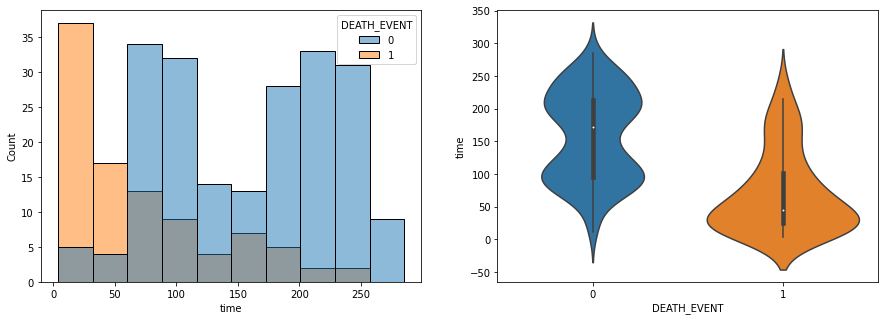

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x='time', hue="DEATH_EVENT", data=df) # 추적기간이 짧을수록 사망률이 높았다. 빠른 진단과 관리가 매우 중요함
plt.subplot(122)
sns.violinplot(x='DEATH_EVENT',y= 'time', data=df)

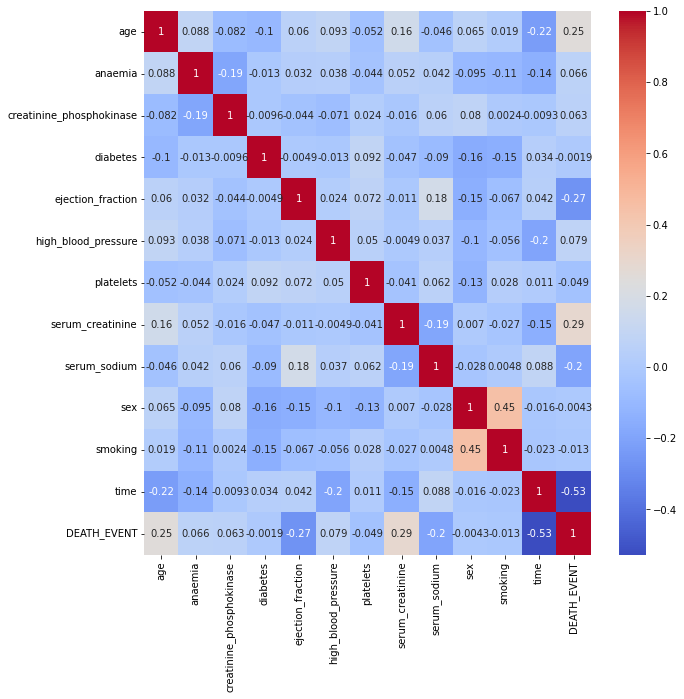

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), 
            annot=True, cmap='coolwarm')

- 상관계수 히트맵 결과
  - DEATH_EVENT와 time과 ejection_fraction, serum sodium은 약한 음의 상관관계를 띄고
  - age, serum_sodium도 약한 양의 상관관계를 띈다.
  - 직접적인 상관관계가 있다고 볼수 있는 것은 time 정도로 보여짐

### 이상치 확인

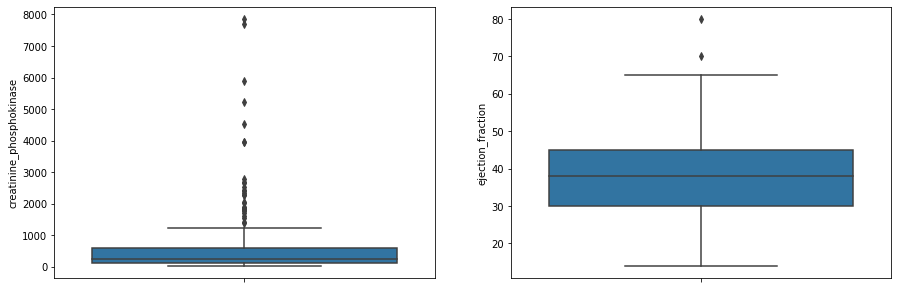

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(y='creatinine_phosphokinase',data=df,) # 혈중 CPK 농도. 이상치 존재
plt.subplot(122)
sns.boxplot(y='ejection_fraction',data=df) # 심장 수축 능력. 


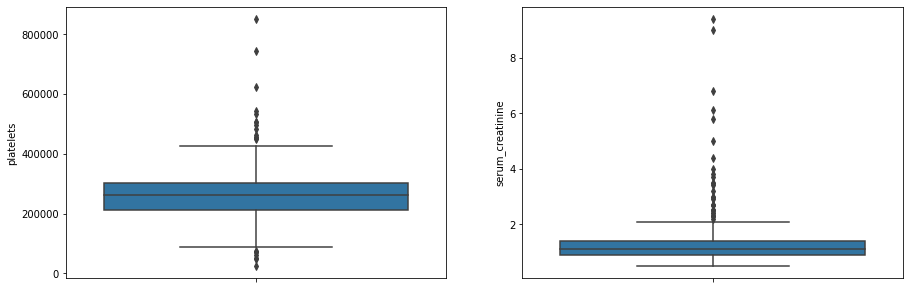

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(y='platelets',data=df) # 혈소판 갯수. 이상치 존재
plt.subplot(122)
sns.boxplot(y='serum_creatinine',data=df) # 혈중 크레아틴 농도. 이상치 존재

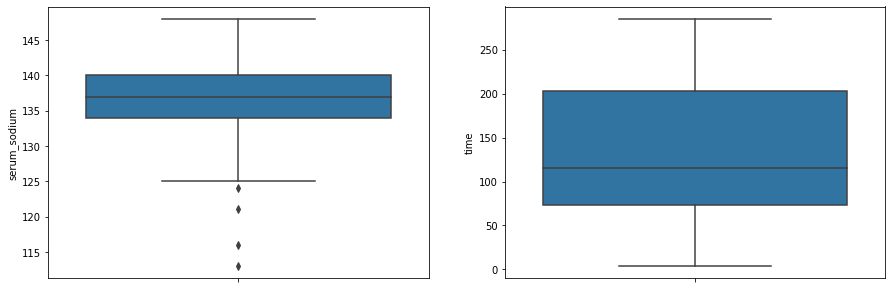

In [40]:
plt.figure(figsize=(15,5))
plt.subplot(122)
sns.boxplot(y='time',data=df) # 사후관리 기간.
plt.subplot(121)
sns.boxplot(y='serum_sodium',data=df) # 혈중 나트륨 농도 약한 이상치 존재

- 이상치가 2개 ~ 많게는 10개 까지 존재함
- 데이터 샘플이 적어서 이상치 제거 전 후 모델 둘다 성능 평가 후 판단

## 전처리 이상치제거 X, 오버샘플링 X

In [41]:
df1 = df.copy() #데이터 복사

### StandardScaler를 이용해 수치형 데이터 표준화하기

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium','time']]
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


### 학습데이터와 테스트데이터 분리하기


In [43]:
X_scaled.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [45]:
cat_lst = ['anaemia', 'diabetes','high_blood_pressure','sex','smoking']
X = pd.concat([X_scaled, df[cat_lst]], axis=1)
y = df['DEATH_EVENT']

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   creatinine_phosphokinase  299 non-null    float64
 2   ejection_fraction         299 non-null    float64
 3   platelets                 299 non-null    float64
 4   serum_creatinine          299 non-null    float64
 5   serum_sodium              299 non-null    float64
 6   time                      299 non-null    float64
 7   anaemia                   299 non-null    int64  
 8   diabetes                  299 non-null    int64  
 9   high_blood_pressure       299 non-null    int64  
 10  sex                       299 non-null    int64  
 11  smoking                   299 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 28.2 KB


In [47]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### 머신러닝 모델링 

In [48]:
# 평가함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현률 : {2:.4f},\
  F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

In [49]:
# 인자로 사이킷런의 Estimator 객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
# ML알고리즘 객체 전달 후 학습/예측/평가 함수
def get_model_train_eval(model, ftr_train=None, ftr_test=None,
                         tgt_train=None, tgt_test=None):
  start_time = time.time()
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test, pred)
  print('수행시간 : {0:.1f}초 '.format(time.time() - start_time))

#### 로지스틱 회귀

In [50]:
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=2000)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[56  5]
 [ 9 20]]
정확도 : 0.8444, 정밀도 : 0.8000, 재현률 : 0.6897,  F1 : 0.7407
수행시간 : 0.0초 


#### Dicision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[53  8]
 [10 19]]
정확도 : 0.8000, 정밀도 : 0.7037, 재현률 : 0.6552,  F1 : 0.6786
수행시간 : 0.0초 


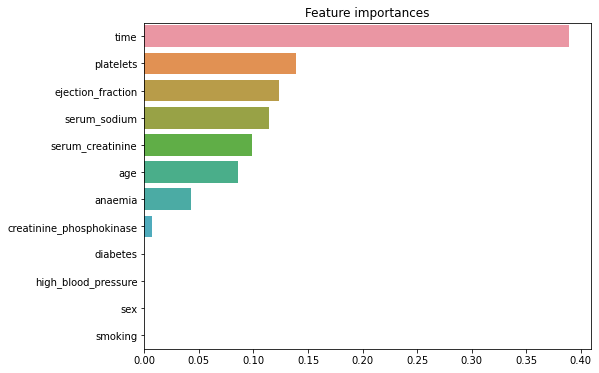

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
dtree = DecisionTreeClassifier()
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]}
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 
           'rank_test_score','split0_test_score', 
           'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 5}",0.803949,6,0.833333,0.785714,0.761905
1,"{'max_depth': 2, 'min_samples_leaf': 10}",0.803949,6,0.833333,0.785714,0.761905
2,"{'max_depth': 2, 'min_samples_leaf': 20}",0.808711,1,0.833333,0.785714,0.785714
3,"{'max_depth': 2, 'min_samples_leaf': 50}",0.798955,8,0.761905,0.857143,0.761905
4,"{'max_depth': 2, 'min_samples_leaf': 100}",0.679443,21,0.690476,0.690476,0.666667
5,"{'max_depth': 2, 'min_samples_leaf': 200}",0.679443,21,0.690476,0.690476,0.666667
6,"{'max_depth': 3, 'min_samples_leaf': 5}",0.751103,17,0.809524,0.761905,0.761905
7,"{'max_depth': 3, 'min_samples_leaf': 10}",0.775377,13,0.809524,0.714286,0.761905
8,"{'max_depth': 3, 'min_samples_leaf': 20}",0.808711,1,0.833333,0.785714,0.785714
9,"{'max_depth': 3, 'min_samples_leaf': 50}",0.798955,8,0.761905,0.857143,0.761905


In [54]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
estimator_matrix = metrics.confusion_matrix(y_test, pred)  
print(estimator_matrix)
print(classification_report(y_test, pred))

[[60  1]
 [10 19]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        61
           1       0.95      0.66      0.78        29

    accuracy                           0.88        90
   macro avg       0.90      0.82      0.85        90
weighted avg       0.89      0.88      0.87        90



#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[60  1]
 [ 8 21]]
정확도 : 0.9000, 정밀도 : 0.9545, 재현률 : 0.7241,  F1 : 0.8235
수행시간 : 5.5초 


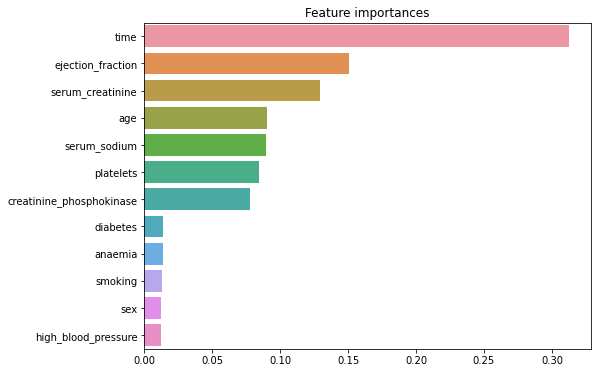

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### Support Vector Machines Classifier


In [57]:
from sklearn import svm
# 모형 객체 생성 (기본값 kernel='rbf' 적용)
svm = svm.SVC()
svm.fit(X_train, y_train) 
get_model_train_eval(svm, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[59  2]
 [ 8 21]]
정확도 : 0.8889, 정밀도 : 0.9130, 재현률 : 0.7241,  F1 : 0.8077
수행시간 : 0.0초 


#### KNN

In [58]:
k_lst = list(range(1,12,2))
# 모델 생성/학습
for k in k_lst:
  print('****************************K={}****************************'.format(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  knn_matrix = metrics.confusion_matrix(y_test, pred)  
  print(knn_matrix)
  print(classification_report(y_test, pred))

****************************K=1****************************
[[53  8]
 [12 17]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        61
           1       0.68      0.59      0.63        29

    accuracy                           0.78        90
   macro avg       0.75      0.73      0.74        90
weighted avg       0.77      0.78      0.77        90

****************************K=3****************************
[[57  4]
 [12 17]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        61
           1       0.81      0.59      0.68        29

    accuracy                           0.82        90
   macro avg       0.82      0.76      0.78        90
weighted avg       0.82      0.82      0.81        90

****************************K=5****************************
[[59  2]
 [16 13]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        61


## 전처리 이상치제거 X, 오버샘플링 O

In [59]:
df2 = df.copy() #데이터 복사

In [60]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('학습 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    67.942584
1    32.057416
Name: DEATH_EVENT, dtype: float64
학습 데이터 레이블 값 비율
0    67.777778
1    32.222222
Name: DEATH_EVENT, dtype: float64


In [61]:
print(X_train.shape)
print(X_test.shape)

(209, 12)
(90, 12)


#### 오버 샘플링

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (209, 12) (209,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (284, 12) (284,)
SMOTE 적용 후 레이블 값 분포: 
 0    142
1    142
Name: DEATH_EVENT, dtype: int64


### 머신러닝 모델링 

#### 로지스틱 회귀

In [63]:
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=2000)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[56  5]
 [ 9 20]]
정확도 : 0.8444, 정밀도 : 0.8000, 재현률 : 0.6897,  F1 : 0.7407
수행시간 : 0.0초 


#### Dicision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[56  5]
 [10 19]]
정확도 : 0.8333, 정밀도 : 0.7917, 재현률 : 0.6552,  F1 : 0.7170
수행시간 : 0.0초 


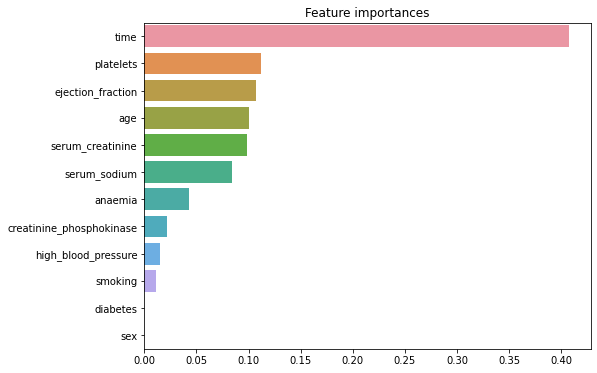

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
dtree = DecisionTreeClassifier()
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]}
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 
           'rank_test_score','split0_test_score', 
           'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 5}",0.803949,6,0.833333,0.785714,0.761905
1,"{'max_depth': 2, 'min_samples_leaf': 10}",0.803949,6,0.833333,0.785714,0.761905
2,"{'max_depth': 2, 'min_samples_leaf': 20}",0.808711,1,0.833333,0.785714,0.785714
3,"{'max_depth': 2, 'min_samples_leaf': 50}",0.798955,8,0.761905,0.857143,0.761905
4,"{'max_depth': 2, 'min_samples_leaf': 100}",0.679443,21,0.690476,0.690476,0.666667
5,"{'max_depth': 2, 'min_samples_leaf': 200}",0.679443,21,0.690476,0.690476,0.666667
6,"{'max_depth': 3, 'min_samples_leaf': 5}",0.760627,17,0.809524,0.761905,0.761905
7,"{'max_depth': 3, 'min_samples_leaf': 10}",0.775377,13,0.809524,0.714286,0.761905
8,"{'max_depth': 3, 'min_samples_leaf': 20}",0.808711,1,0.833333,0.785714,0.785714
9,"{'max_depth': 3, 'min_samples_leaf': 50}",0.798955,8,0.761905,0.857143,0.761905


In [67]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
estimator_matrix = metrics.confusion_matrix(y_test, pred)  
print(estimator_matrix)
print(classification_report(y_test, pred))

[[60  1]
 [10 19]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        61
           1       0.95      0.66      0.78        29

    accuracy                           0.88        90
   macro avg       0.90      0.82      0.85        90
weighted avg       0.89      0.88      0.87        90



#### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[60  1]
 [ 8 21]]
정확도 : 0.9000, 정밀도 : 0.9545, 재현률 : 0.7241,  F1 : 0.8235
수행시간 : 5.4초 


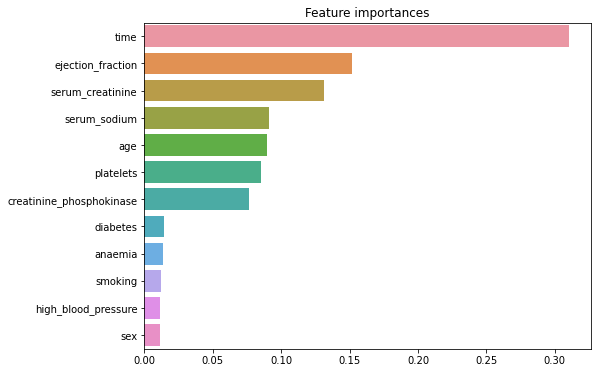

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### Support Vector Machines Classifier


In [70]:
from sklearn import svm
# 모형 객체 생성 (기본값 kernel='rbf' 적용)
svm = svm.SVC()
svm.fit(X_train, y_train) 
get_model_train_eval(svm, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[59  2]
 [ 8 21]]
정확도 : 0.8889, 정밀도 : 0.9130, 재현률 : 0.7241,  F1 : 0.8077
수행시간 : 0.0초 


#### KNN

In [71]:
k_lst = list(range(1,12,2))
# 모델 생성/학습
for k in k_lst:
  print('****************************K={}****************************'.format(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  knn_matrix = metrics.confusion_matrix(y_test, pred)  
  print(knn_matrix)
  print(classification_report(y_test, pred))

****************************K=1****************************
[[53  8]
 [12 17]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        61
           1       0.68      0.59      0.63        29

    accuracy                           0.78        90
   macro avg       0.75      0.73      0.74        90
weighted avg       0.77      0.78      0.77        90

****************************K=3****************************
[[57  4]
 [12 17]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        61
           1       0.81      0.59      0.68        29

    accuracy                           0.82        90
   macro avg       0.82      0.76      0.78        90
weighted avg       0.82      0.82      0.81        90

****************************K=5****************************
[[59  2]
 [16 13]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        61


## 이상치 제거 O, 오버샘플링 O

In [280]:
df2 = df1.copy()

In [949]:
df = df1.copy()

#### 혈중 CPK 농도 분포

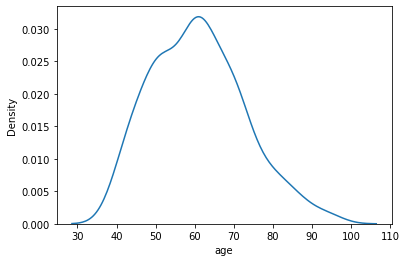

In [924]:
# 나이 분포
sns.kdeplot(x=df['age'])

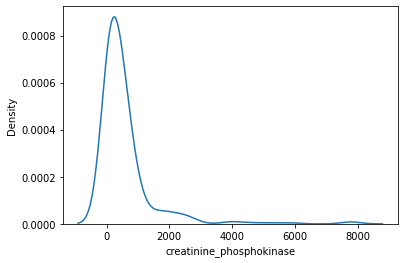

In [867]:
# 혈중 CPK 농도 분포
sns.kdeplot(x=df['creatinine_phosphokinase'])

In [868]:
# 이상치 확인
df['creatinine_phosphokinase'].quantile(0.94)

1910.5200000000004

In [869]:
p1 = df['creatinine_phosphokinase'].quantile(0.94)

In [870]:
# 불린 인덱싱을 이용한 이상치 제거
df = df[p1 > df['creatinine_phosphokinase']] 

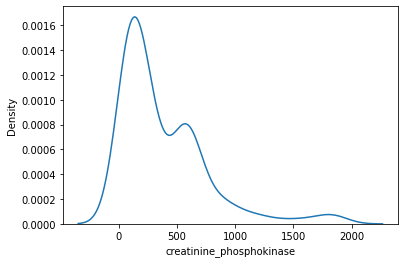

In [871]:
# 이상치 제거 후 혈중 CPK 농도 분포
sns.kdeplot(x=df['creatinine_phosphokinase'])

#### 심장수축은 0.995로 이상치를 지워도 결과가 안좋아진다.

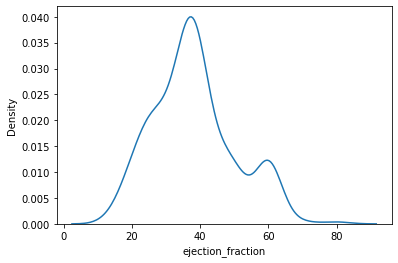

In [692]:
# 심장수축 능력 분포
sns.kdeplot(x=df['ejection_fraction'])

In [693]:
# 이상치 확인
df['ejection_fraction'].quantile(0.995)

68.00000000000011

In [694]:
p1 = df['ejection_fraction'].quantile(0.995)

In [695]:
# 불린 인덱싱을 이용한 이상치 제거
df = df[p1 > df['ejection_fraction']] 

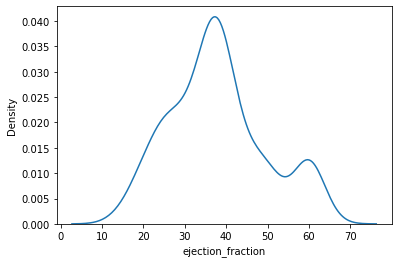

In [696]:
# 이상치 제거 후 심장수축 능력 분포
sns.kdeplot(x=df['ejection_fraction'])

#### 혈소판만 제거하는게 가장 정확도가 높음

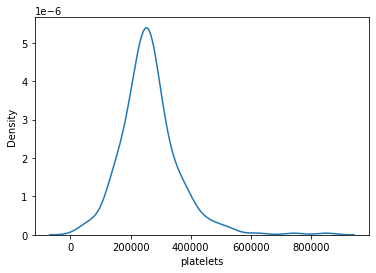

In [950]:
# 혈소판 수치 분포
sns.kdeplot(x=df['platelets']) 

In [951]:
# # 이상치 확인
# print(df['platelets'].quantile(0.96))
# print(df['platelets'].quantile(0.02))

In [952]:
# p1 = df['platelets'].quantile(0.96)
# p2 = df['platelets'].quantile(0.02)

In [953]:
# # 불린 인덱싱을 이용한 이상치 제거
# df = df[(p1 > df['platelets']) & (p2 < df['platelets'])] 

In [954]:
# 이상치 확인
df['platelets'].quantile(0.99)

544559.9999999986

In [955]:
p1 = df['platelets'].quantile(0.99)

In [956]:
df = df[p1 >df['platelets']]

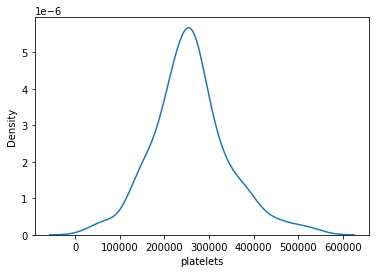

In [957]:
# 이상치 제거 후 심장수축 능력 분포
sns.kdeplot(x=df['platelets'])

#### 혈중 크레아틴 농도 

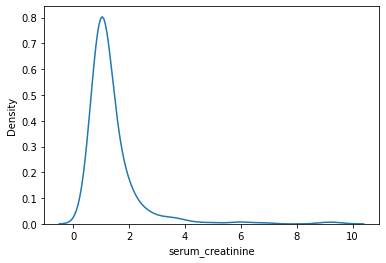

In [925]:
# 혈중 크레아틴 농도 분포
sns.kdeplot(x=df['serum_creatinine'])

In [818]:
# 이상치 확인
df['serum_creatinine'].quantile(0.97)

3.7060000000000004

In [819]:
p1 = df['serum_creatinine'].quantile(0.97)

In [820]:
# 불린 인덱싱을 이용한 이상치 제거
df = df[p1 > df['serum_creatinine']] 

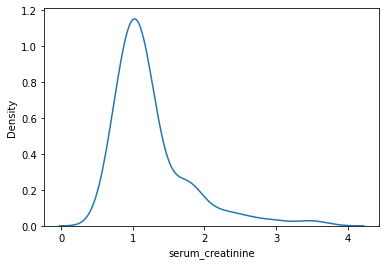

In [821]:
# 이상치 제거 후 심장수축 능력 분포
sns.kdeplot(x=df['serum_creatinine'])

#### 혈중 나트륨 농도

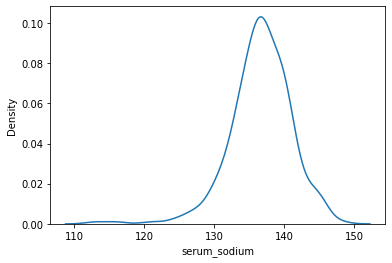

In [926]:
# 혈중 나트륨 농도 분포
sns.kdeplot(x=df['serum_sodium'])

In [927]:
# 이상치 확인
df['serum_sodium'].quantile(0.01)

123.94

In [928]:
p1 = df['serum_sodium'].quantile(0.01)

In [929]:
# 불린 인덱싱을 이용한 이상치 제거
df = df[p1 < df['serum_sodium']] 

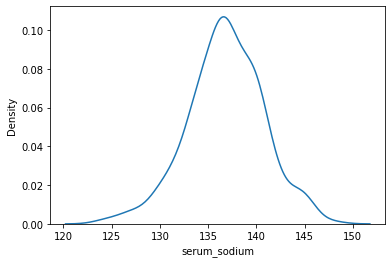

In [930]:
# 이상치 제거 후 심장수축 능력 분포
sns.kdeplot(x=df['serum_sodium'])

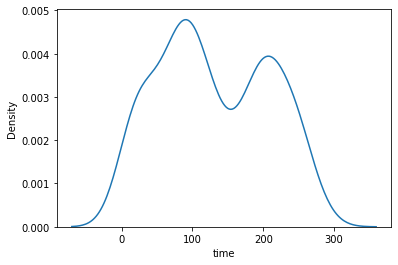

In [642]:
# 사후관리 기간 분포
sns.kdeplot(x=df['time'])

In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       296 non-null    float64
 1   anaemia                   296 non-null    int64  
 2   creatinine_phosphokinase  296 non-null    int64  
 3   diabetes                  296 non-null    int64  
 4   ejection_fraction         296 non-null    int64  
 5   high_blood_pressure       296 non-null    int64  
 6   platelets                 296 non-null    float64
 7   serum_creatinine          296 non-null    float64
 8   serum_sodium              296 non-null    int64  
 9   sex                       296 non-null    int64  
 10  smoking                   296 non-null    int64  
 11  time                      296 non-null    int64  
 12  DEATH_EVENT               296 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 40.5 KB


기존 299개의 데이터에서 이상치 데이터 27개를 제거한 272개의 데이터

### StandardScaler를 이용해 수치형 데이터 표준화하기

In [958]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = df[['age',  'ejection_fraction', 'platelets', 'serum_creatinine','time','creatinine_phosphokinase','serum_sodium']]
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,age,ejection_fraction,platelets,serum_creatinine,time,creatinine_phosphokinase,serum_sodium
0,1.190031,-1.530021,0.075802,0.486698,-1.630144,0.003422,-1.494515
1,-0.498334,-0.004010,0.056503,-0.284567,-1.604278,7.511430,-0.135448
2,0.345849,-1.530021,-1.134838,-0.091751,-1.591346,-0.446295,-1.721026
3,-0.920425,-1.530021,-0.570656,0.486698,-1.591346,-0.482396,0.091064
4,0.345849,-1.530021,0.804537,1.257963,-1.578413,-0.431855,-4.665671


### 학습데이터와 테스트데이터 분리하기


In [959]:
X_scaled.columns

Index(['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'time',
       'creatinine_phosphokinase', 'serum_sodium'],
      dtype='object')

In [960]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [961]:
cat_lst = ['anaemia', 'high_blood_pressure']
X = pd.concat([X_scaled, df[cat_lst]], axis=1)
y = df['DEATH_EVENT']

In [962]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 298
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       296 non-null    float64
 1   ejection_fraction         296 non-null    float64
 2   platelets                 296 non-null    float64
 3   serum_creatinine          296 non-null    float64
 4   time                      296 non-null    float64
 5   creatinine_phosphokinase  296 non-null    float64
 6   serum_sodium              296 non-null    float64
 7   anaemia                   296 non-null    int64  
 8   high_blood_pressure       296 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 23.1 KB


In [963]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [964]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('학습 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    68.115942
1    31.884058
Name: DEATH_EVENT, dtype: float64
학습 데이터 레이블 값 비율
0    67.41573
1    32.58427
Name: DEATH_EVENT, dtype: float64


In [965]:
print(X_train.shape)
print(X_test.shape)

(207, 9)
(89, 9)


In [966]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (207, 9) (207,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (282, 9) (282,)
SMOTE 적용 후 레이블 값 분포: 
 0    141
1    141
Name: DEATH_EVENT, dtype: int64


### 머신러닝 모델링 

#### 로지스틱 회귀

In [967]:
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=2000)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[54  6]
 [ 6 23]]
정확도 : 0.8652, 정밀도 : 0.7931, 재현률 : 0.7931,  F1 : 0.7931
수행시간 : 0.0초 


#### Support Vector Machines Classifier


In [ ]:
from sklearn import svm
# 모형 객체 생성 (기본값 kernel='rbf' 적용)
svm = svm.SVC()
svm.fit(X_train, y_train) 
get_model_train_eval(svm, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[52  8]
 [ 9 20]]
정확도 : 0.8090, 정밀도 : 0.7143, 재현률 : 0.6897,  F1 : 0.7018
수행시간 : 0.0초 


#### KNN

In [ ]:
k_lst = list(range(1,12,2))
# 모델 생성/학습
for k in k_lst:
  print('****************************K={}****************************'.format(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  knn_matrix = metrics.confusion_matrix(y_test, pred)  
  print(knn_matrix)
  print(classification_report(y_test, pred))

****************************K=1****************************
[[51  9]
 [14 15]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        60
           1       0.62      0.52      0.57        29

    accuracy                           0.74        89
   macro avg       0.70      0.68      0.69        89
weighted avg       0.73      0.74      0.73        89

****************************K=3****************************
[[51  9]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        60
           1       0.69      0.69      0.69        29

    accuracy                           0.80        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.80      0.80      0.80        89

****************************K=5****************************
[[53  7]
 [11 18]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        60


#### Dicision Tree

In [968]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[51  9]
 [10 19]]
정확도 : 0.7865, 정밀도 : 0.6786, 재현률 : 0.6552,  F1 : 0.6667
수행시간 : 0.0초 


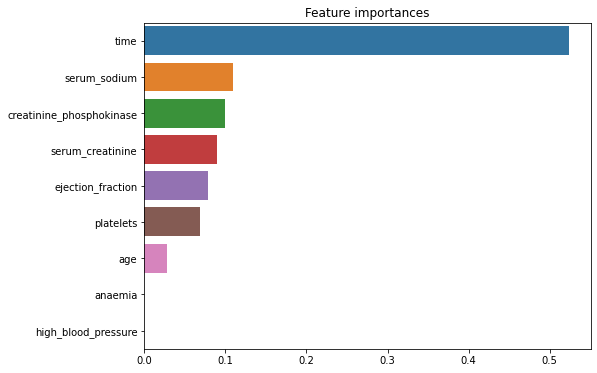

In [969]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [970]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
dtree = DecisionTreeClassifier()
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]}
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 
           'rank_test_score','split0_test_score', 
           'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 5}",0.777700,9,0.761905,0.809524,0.804878
1,"{'max_depth': 2, 'min_samples_leaf': 10}",0.777700,9,0.761905,0.809524,0.804878
2,"{'max_depth': 2, 'min_samples_leaf': 20}",0.782578,1,0.761905,0.809524,0.804878
3,"{'max_depth': 2, 'min_samples_leaf': 50}",0.744715,16,0.761905,0.571429,0.829268
4,"{'max_depth': 2, 'min_samples_leaf': 100}",0.681185,21,0.690476,0.666667,0.682927
5,"{'max_depth': 2, 'min_samples_leaf': 200}",0.681185,21,0.690476,0.666667,0.682927
6,"{'max_depth': 3, 'min_samples_leaf': 5}",0.768177,13,0.785714,0.738095,0.780488
7,"{'max_depth': 3, 'min_samples_leaf': 10}",0.773171,11,0.738095,0.761905,0.829268
8,"{'max_depth': 3, 'min_samples_leaf': 20}",0.782578,1,0.761905,0.809524,0.804878
9,"{'max_depth': 3, 'min_samples_leaf': 50}",0.744715,16,0.761905,0.571429,0.829268


In [971]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
estimator_matrix = metrics.confusion_matrix(y_test, pred)  
print(estimator_matrix)
print(classification_report(y_test, pred))

[[59  1]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.96      0.76      0.85        29

    accuracy                           0.91        89
   macro avg       0.93      0.87      0.89        89
weighted avg       0.91      0.91      0.91        89



#### Random Forest

In [975]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=3000, n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[55  5]
 [ 3 26]]
정확도 : 0.9101, 정밀도 : 0.8387, 재현률 : 0.8966,  F1 : 0.8667
수행시간 : 10.3초 


##### 하이퍼 파라미터 튜닝

In [1033]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [400],
    'max_depth' : [4,6,8,10,12],
    'min_samples_leaf' : [6,8,12,15,18],
    'min_samples_split' : [4,8,16,20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid =params , cv = 5, n_jobs = -1) 
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 400}
최고 예측 정확도:0.8455


In [1036]:
# 위에 최적의 모델 하이퍼 파라미터를 대입해서 출력) -> refit = True 대신하는 느낌
rf_clf1 = RandomForestClassifier(n_estimators= 400,
                                 max_depth = 4,
                                min_samples_leaf =  6,
                                min_samples_split = 16)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9101


In [1037]:
get_clf_eval(y_test, pred)

오차 행렬
[[56  4]
 [ 4 25]]
정확도 : 0.9101, 정밀도 : 0.8621, 재현률 : 0.8621,  F1 : 0.8621


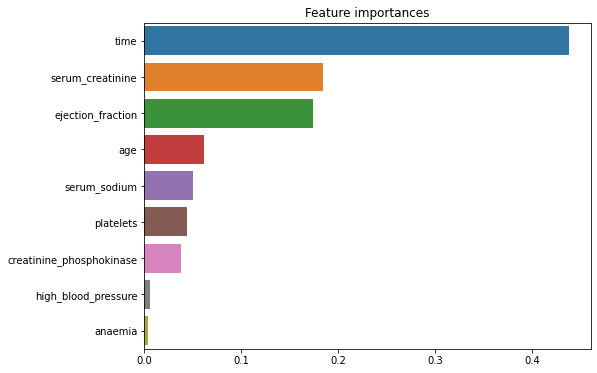

In [1038]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### GBM


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=3000, n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

In [1017]:
from sklearn.ensemble import GradientBoostingClassifier
import time # 컴퓨터 시간 모듈
# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time() # 시작시간을 저장

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간 : {0:.1f}초'.format(time.time() - start_time)) # 소요시간 계산

GBM 정확도: 0.8315
GBM 수행시간 : 0.1초


##### GBM 하이퍼 파라미터 튜닝

In [1014]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [1000, 2000],
    'learning_rate' : [0.05, 0.1, 0.2]
}

grid_cv  = GridSearchCV(gb_clf , param_grid = params, cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
최적 하이퍼 파라미터 : 
 {'learning_rate': 0.2, 'n_estimators': 1000}
최고 예측 정확도:0.7971


In [1018]:
get_model_train_eval(gb_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[50 10]
 [ 5 24]]
정확도 : 0.8315, 정밀도 : 0.7059, 재현률 : 0.8276,  F1 : 0.7619
수행시간 : 0.1초 


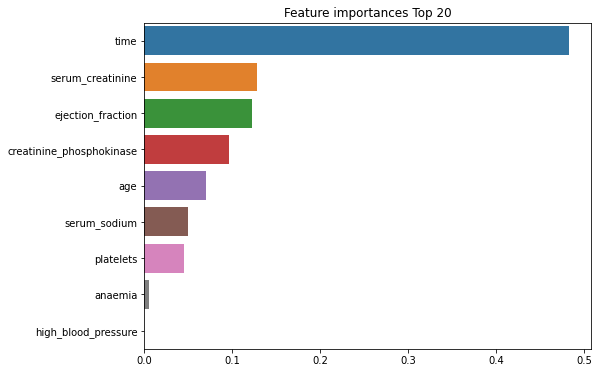

In [1019]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] # ascending = False -> 내림차순

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

#### LightGBM
  - lightGBM / XGBoost 파라미터 설명

In [1020]:
# LightGBM의 파이썬 패키지인 lightbgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_clf = LGBMClassifier(n_estimators=500)

# LightGBM도 동일하게 조기 중단 수행 가능
evals = [(X_test, y_test)] #가중치 변할때마다 평가
lgbm_clf.fit(X_train, y_train, early_stopping_rounds =100, eval_metric ="logloss", # early_stopping_rounds -> 100번이상 같은 가중치면 최적이라보고 모델 정지
             eval_set = evals, verbose = True) # verbose 상세정보 출력
preds = lgbm_clf.predict(X_test)

[1]	valid_0's binary_logloss: 0.576752	valid_0's binary_logloss: 0.576752
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.53578	valid_0's binary_logloss: 0.53578
[3]	valid_0's binary_logloss: 0.500684	valid_0's binary_logloss: 0.500684
[4]	valid_0's binary_logloss: 0.472504	valid_0's binary_logloss: 0.472504
[5]	valid_0's binary_logloss: 0.449126	valid_0's binary_logloss: 0.449126
[6]	valid_0's binary_logloss: 0.427048	valid_0's binary_logloss: 0.427048
[7]	valid_0's binary_logloss: 0.408839	valid_0's binary_logloss: 0.408839
[8]	valid_0's binary_logloss: 0.391597	valid_0's binary_logloss: 0.391597
[9]	valid_0's binary_logloss: 0.375279	valid_0's binary_logloss: 0.375279
[10]	valid_0's binary_logloss: 0.367645	valid_0's binary_logloss: 0.367645
[11]	valid_0's binary_logloss: 0.357742	valid_0's binary_logloss: 0.357742
[12]	valid_0's binary_logloss: 0.351515	valid_0's binary_logloss: 0.351515
[13]	valid_0's binary_logloss: 0.348256	valid_0'

In [1021]:
get_clf_eval(y_test, preds)

오차 행렬
[[53  7]
 [ 4 25]]
정확도 : 0.8764, 정밀도 : 0.7812, 재현률 : 0.8621,  F1 : 0.8197


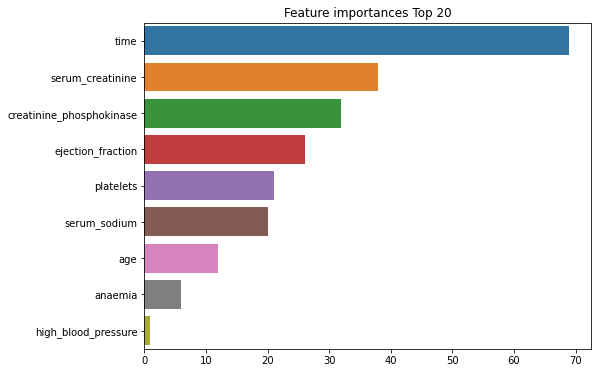

In [1024]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = lgbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] # ascending = False -> 내림차순

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

### XGBoost(eXtra Gradeint Boost)

In [1025]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
pred = xgb_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[53  7]
 [ 4 25]]
정확도 : 0.8764, 정밀도 : 0.7812, 재현률 : 0.8621,  F1 : 0.8197


In [1030]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,7,9],
    'eta' : [0.1],
    'objdective' : ['binary:logistic'],
    'eval_metric' : ['logloss'],
    'early_stoppings' : [100]
}
num_rounds = 1000

grid_cv  = GridSearchCV(xgb_clf , param_grid = params, cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'early_stoppings': [100], 'eta': [0.1],
                         'eval_metric': ['logloss'], 'max_depth': [3, 5, 7, 9],
                         'objdective': ['binary:logistic']},
             verbose=1)

In [1031]:
print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'early_stoppings': 100, 'eta': 0.1, 'eval_metric': 'logloss', 'max_depth': 7, 'objdective': 'binary:logistic'}
최고 예측 정확도:0.8159


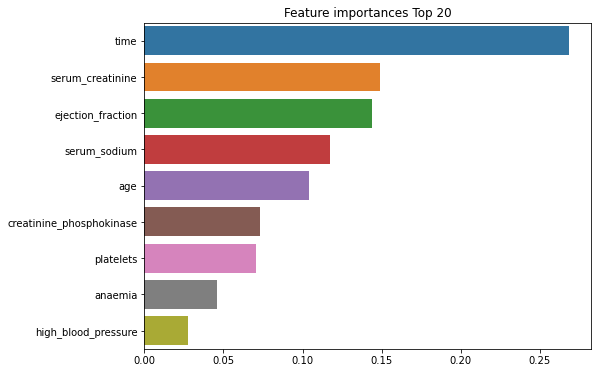

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20] # ascending = False -> 내림차순

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

## 결과

### 머신러닝 모델 결과

#### 1. 로지스틱 회귀

- 전처리 이상치제거 X, 오버샘플링 X

오차 행렬
[[50 11]
 [10 19]]
정확도 : 0.7667, 정밀도 : 0.6333, 재현률 : 0.6552,  F1 : 0.6441

- 전처리 이상치제거 X, 오버샘플링 O

오차 행렬
[[50 11]
 [10 19]]
정확도 : 0.7667, 정밀도 : 0.6333, 재현률 : 0.6552,  F1 : 0.6441


- 이상치 제거 O, 오버샘플링 O

오차 행렬
[[54  6]
 [ 6 23]]
정확도 : 0.8652, 정밀도 : 0.7931, 재현률 : 0.7931,  F1 : 0.7931


---
#### 2. Dicision Tree
- 전처리 이상치제거 X, 오버샘플링 X

오차 행렬
[[51 10]
 [11 18]]
정확도 : 0.7667, 정밀도 : 0.6429, 재현률 : 0.6207,  F1 : 0.6316

- 전처리 이상치제거 X, 오버샘플링 O

오차 행렬
[[53  8]
 [13 16]]
accuracy                           0.77

- 이상치 제거 O, 오버샘플링 O

[[59  1]
 [ 7 22]]accuracy                           0.91


---
#### 3. Random Forest

- 전처리 이상치제거 X, 오버샘플링 X

오차 행렬
[[53  8]
 [10 19]]
정확도 : 0.8000, 정밀도 : 0.7037, 재현률 : 0.6552,  F1 : 0.6786

- 전처리 이상치제거 X, 오버샘플링 

오차 행렬
[[53  8]
 [ 9 20]]
정확도 : 0.8111, 정밀도 : 0.7143, 재현률 : 0.6897,  F1 : 0.7018

- #### 이상치 제거 O, 오버샘플링 O

오차 행렬
[[55  5]
 [ 3 26]]
정확도 : 0.9101, 정밀도 : 0.8387, 재현률 : 0.8966,  F1 : 0.8667

---
#### 4. SVM

- 전처리 이상치제거 X, 오버샘플링 X

오차 행렬
[[53  8]
 [12 17]]
정확도 : 0.7778, 정밀도 : 0.6800, 재현률 : 0.5862,  F1 : 0.6296

- 전처리 이상치제거 X, 오버샘플링 O

오차 행렬
[[53  8]
 [12 17]]
정확도 : 0.7778, 정밀도 : 0.6800, 재현률 : 0.5862,  F1 : 0.6296

- 이상치 제거 O, 오버샘플링 O

오차 행렬
[[52  5]
 [12 13]]
정확도 : 0.7927, 정밀도 : 0.7222, 재현률 : 0.5200,  F1 : 0.6047

---

#### 5. KNN

- 전처리 이상치제거 X, 오버샘플링 X

[[56  5]
 [15 14]]
accuracy   0.78  

- 전처리 이상치제거 X, 오버샘플링 O

[[56  5]
 [15 14]]
 accuracy  0.78 


- 이상치 제거 O, 오버샘플링 O

[[55  2]
 [14 11]]
 accuracy 0.80 


#### 6. GBM
오차 행렬
[[50 10]
 [ 5 24]]
정확도 : 0.8315, 정밀도 : 0.7059, 재현률 : 0.8276,  F1 : 0.7619

#### 7. LGBM
오차 행렬
[[53  7]
 [ 4 25]]
정확도 : 0.8764, 정밀도 : 0.7812, 재현률 : 0.8621,  F1 : 0.8197

#### 8. XGBM
오차 행렬
[[53  7]
 [ 4 25]]
정확도 : 0.8764, 정밀도 : 0.7812, 재현률 : 0.8621,  F1 : 0.8197


모든 모델에서 전처리와 오버샘플링을 진행한 데이터셋이 높은 정확도를 보였다.

가장 높은 정확도를 보인 모델은 Random Forest 모델로 정확도는 0.9101이다.